## Simulation Tutorial

In [1]:
import PyPWA as pwa
import numpy as npy
import pandas
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# *Define (import) amplitude (function) to simulate*

>The function will be use by the rejection method to "carve" a new distribution into the input simulated data read in next lines.

In [2]:
#
import AmplitudeJPACsim
amp = AmplitudeJPACsim.NewAmplitude()

# *Read input (flat) simulated data (in condense format)*

In [3]:
data = pwa.read("etapiHEL2_flat.txt")

> Read data full (from gamp files)

In [4]:
datag = pwa.read("../TUTORIAL_FILES/raw_events.gamp")

> The format of the input data will depend on the Amplitudes: In this example
> the standard HEL angles, polarization angle (alpha) and other information neccesary are given for PWA (see below)

In [5]:
data

,EventN,theta,phi,alpha,pol,tM,mass
0,0.0,1.902160,3.800470,-1.074900,0.4,-0.026354,0.850234
1,1.0,0.916137,1.660230,-1.438370,0.4,-0.671785,2.619530
2,2.0,1.811330,5.778960,-2.341440,0.4,-0.077582,1.268280
3,3.0,2.000940,5.250000,2.709120,0.4,-0.726730,1.253960
4,4.0,1.871130,2.697150,0.239302,0.4,-0.156830,0.927206
...,...,...,...,...,...,...,...
9855141,9855141.0,1.354170,5.931830,0.784408,0.4,-0.054668,1.083350
9855142,9855142.0,2.335000,3.347330,-0.748025,0.4,-0.844509,1.483240
9855143,9855143.0,1.328470,1.948730,-2.102880,0.4,-0.138508,0.940464
9855144,9855144.0,2.184290,2.491810,-1.821200,0.4,-0.314037,0.723398


# *Produce simulation mask*
>> A boolean file of (False and True)

In [6]:
rejection = pwa.monte_carlo_simulation(amp, data, dict(), 16)

> Check on the waves and resonances that will be produced
>> This is a matrix with the weigths of each wave on each resonance

In [7]:
amp.setup(data)
table =[]
tabler=[]

for r in range(amp.resonance.resonance_index):
    tabler.append(amp.resonance.W0[r])
    tabler.append(amp.resonance.Cr[r])
    for w in range(amp.resonance.wave_index):

        tabler.append(amp.resonance.Wave[r][w])
    table.append(tabler)
    tabler=[]

from tabulate import tabulate
headers=["Resonance","Res-weight"]
for w in range(amp.resonance.wave_index):
    headers.append(amp.resonance.wave_data[w])

print(tabulate(table,headers))

  Resonance    Res-weight    (1, 0, 0)    (1, 1, 0)    (1, 1, -1)    (1, 1, 1)    (1, 2, 0)    (1, 2, -1)    (1, 2, 1)    (1, 2, -2)    (1, 2, 2)
-----------  ------------  -----------  -----------  ------------  -----------  -----------  ------------  -----------  ------------  -----------
      0.98           0.65            1          0               0          0           0                0         0                0         0
      1.306          0.35            0          0               0          0           0.33             0         0.33             0         0.33
      1.584          0.08            0          0.5             0          0.5         0                0         0                0         0
      1.722          0.1             0          0               0          0           0.33             0         0.33             0         0.33


> *Check on how many events will be kept through the masking*

In [8]:
print(f"Removed {len(data) - npy.sum(rejection)} events from flat data.")
print(f"Kept {npy.sum(rejection)} events.")
print(f"{(npy.sum(rejection) / len(data)) * 100}% of events remain.")

Removed 9454013 events from flat data.
Kept 401133 events.
4.070289775514234% of events remain.


# *Apply mask to input data*
>> new_data will contain the simulated data in the same format that data/datag

In [9]:
new_data = data[rejection]

In [10]:
new_data

,EventN,theta,phi,alpha,pol,tM,mass
137,137.0,2.206940,1.953870,-0.247381,0.4,-0.120428,0.995635
171,171.0,1.775060,1.264290,2.600410,0.4,-0.345176,1.167540
200,200.0,0.128817,2.396510,-0.063606,0.4,-0.229984,2.269060
205,205.0,0.696665,1.981680,3.079090,0.4,-0.184068,1.885680
237,237.0,1.051710,1.753500,-2.496390,0.4,-1.500240,1.334010
...,...,...,...,...,...,...,...
9855028,9855028.0,0.858080,2.779910,-0.051326,0.4,-0.086823,0.981714
9855041,9855041.0,1.620860,0.822745,1.592530,0.4,-0.451578,1.311310
9855064,9855064.0,0.734074,5.887190,-1.768290,0.4,-0.099859,1.098970
9855075,9855075.0,1.502800,1.512360,0.860545,0.4,-0.162814,1.710660


*Mask full data format*

In [11]:
new_datag = datag[rejection]

>*Write new_data into a Pandas Dateframe*

In [12]:
amp.setup(new_data)
new_data = pandas.DataFrame(new_data)

# *Plot simulated data intensity versus mass*

(0.6, 2.0)

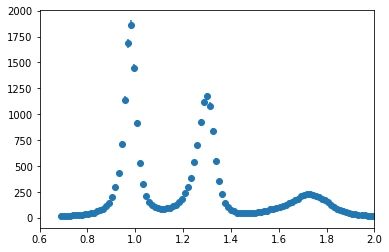

In [13]:
results = amp.calculate()
mni = npy.empty(len(new_data), dtype=[("mass", float), ("intensity", float)])
mni["mass"] = new_data["mass"]
mni["intensity"] = results.real
mni = pandas.DataFrame(mni)
counts, bin_edges = npy.histogram(mni["mass"], 200, weights=mni["intensity"])
centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Add yerr to argment list when we have errors
yerr = npy.empty(100)
yerr = npy.sqrt(counts)
plt.errorbar(centers,counts, yerr, fmt="o")
#plt.yscale("log")
plt.xlim(.6, 2.)

# *Calculate Phase difference between two waves*
>> In this example first and 3erd waves in amplitude list

In [14]:
#if amp.Vs[1]15].all() != 0 and amp.Vs[0][0].all() != 0:
phasediff = npy.arctan(npy.imag(amp.Vs[2][3]*amp.Vs[1][6].conjugate())/npy.real(amp.Vs[2][3]*amp.Vs[1][6].conjugate()))
#phasediff = npy.arctan(npy.imag(amp.Vs[2][1]*amp.Vs[1][2].conjugate())/npy.real(amp.Vs[2][1]*amp.Vs[1][2].conjugate()))

>*Plot PhaseMotion*

(0.6, 2.0)

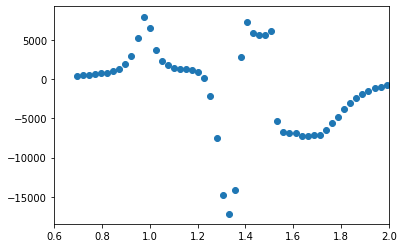

In [15]:
mnip = npy.empty(len(new_data), dtype=[("mass", float), ("phase", float)])
mnip["mass"] = new_data["mass"]
mnip["phase"] = phasediff
mnip = pandas.DataFrame(mnip)
counts, bin_edges = npy.histogram(mnip["mass"], 100, weights=mnip["phase"])
centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Add yerr to argment list when we have errors
yerr = npy.empty(100)
yerr = npy.sqrt(counts)
plt.errorbar(centers,counts, yerr, fmt="o")
plt.xlim(0.6, 2.)

>*Plot phi_HEL vs cosHEL) of simulated data (with 4 different contracts(gamma))*

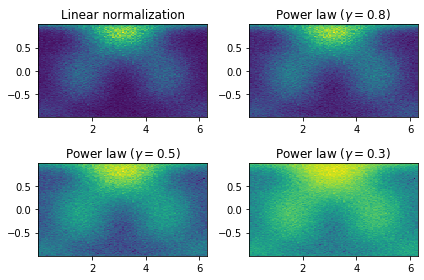

In [16]:
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal

gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(new_data["phi"], npy.cos(new_data["theta"]), bins=100)
#axes[0, 0].hist2d(cut_list["phi"], npy.cos(cut_list["theta"]), bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(new_data["phi"], npy.cos(new_data["theta"]),
        bins=100, norm=mcolors.PowerNorm(gamma))
    
fig.tight_layout()

plt.show()

>*Plot cos(theta_HEL) vs mass for simulated data (with 4 different contrasts)*

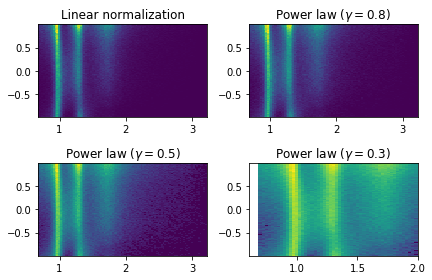

In [17]:
gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(new_data["mass"], npy.cos(new_data["theta"]),bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(new_data["mass"], npy.cos(new_data["theta"]),
              bins=100, norm=mcolors.PowerNorm(gamma))
    

fig.tight_layout()
plt.xlim(.6, 2.)
plt.show()

>*Plot phiHEL vs mass for simulated data (with 4 different contrasts)*

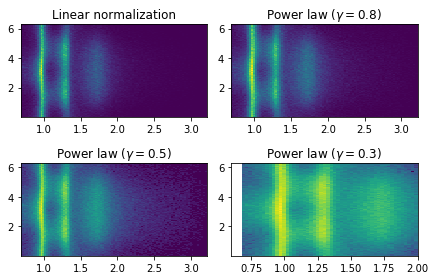

In [18]:
gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(new_data["mass"], new_data["phi"],bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(new_data["mass"], new_data["phi"],
              bins=100, norm=mcolors.PowerNorm(gamma))
    

fig.tight_layout()
plt.xlim(.6, 2.)
plt.show()

>*Histogram of alpha/Phi*
>> alpha/Phi is the polarization angle

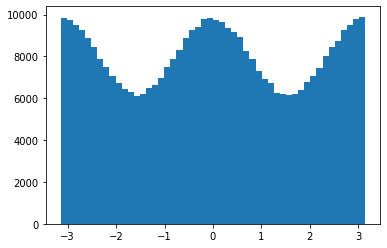

In [19]:
plt.hist(new_data["alpha"],50)
plt.show()

*Plot mass versus alpha/Phi*

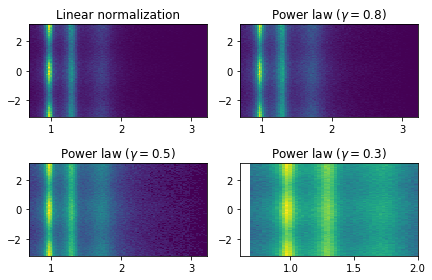

In [20]:
gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(new_data["mass"], new_data["alpha"],bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(new_data["mass"], new_data["alpha"],
              bins=100, norm=mcolors.PowerNorm(gamma))
    

fig.tight_layout()
plt.xlim(.6, 2.)
plt.show()

>*Plot phi_HEL versus alpha/Phi*

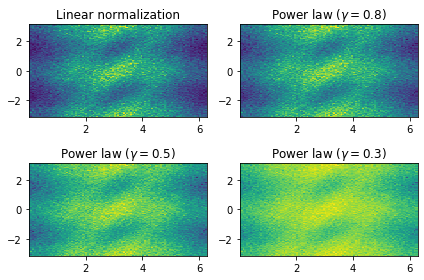

In [21]:
gammas = [0.8, 0.5, 0.3]

fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].set_title('Linear normalization')
axes[0, 0].hist2d(new_data["phi"],new_data["alpha"],bins=100)

for ax, gamma in zip(axes.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f) $' % gamma)
    ax.hist2d(new_data["phi"], new_data["alpha"],
              bins=100, norm=mcolors.PowerNorm(gamma))
    

fig.tight_layout()

plt.show()

# *Write simulated data to disk*

In [23]:
new_data.to_csv("simdata_JPAC.csv", index=False)

> Write gamp data after maked

In [24]:
pwa.write("raw_simulated_JPAC.gamp",new_datag)

# *Calculate Moments (for JPAC or Std) and Asymmetries*

In [25]:
H000,H010,H011,H020,H021,H022,H100,H110,H111,H120,H121,H122,sigma4,sigmay = amp.calculate_moments_JPAC()
#H00,H11,H10,H20,H21,H22 = amp.calculate_moments_STD()

>*Plot (all) Moments versus mass*

(0.6, 2.0)

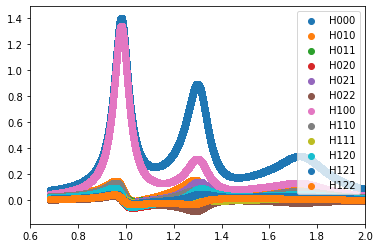

In [26]:
plt.scatter(new_data["mass"],H000,LABEL="H000")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H010,LABEL="H010")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H011,LABEL="H011")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H020,LABEL="H020")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H021,LABEL="H021")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H022,LABEL="H022")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H100,LABEL="H100")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H110,LABEL="H110")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H111,LABEL="H111")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H120,LABEL="H120")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H121,LABEL="H121")
plt.legend(loc='upper right')
plt.scatter(new_data["mass"],H122,LABEL="H122")
plt.legend(loc='upper right')
plt.xlim(0.6, 2.)

> PLot each moment vs mass

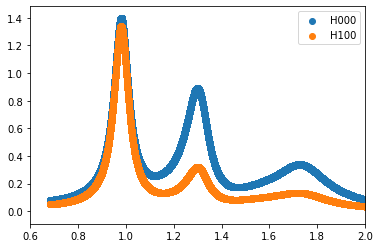

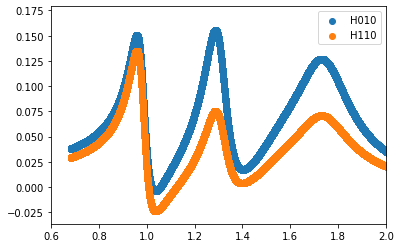

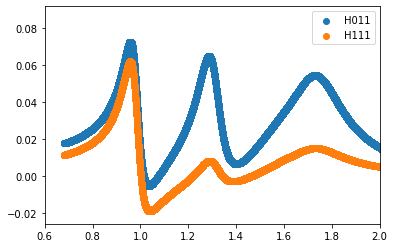

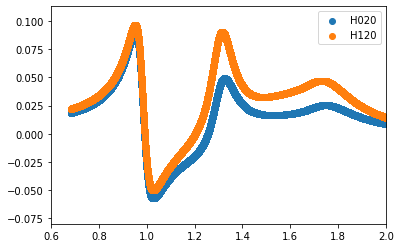

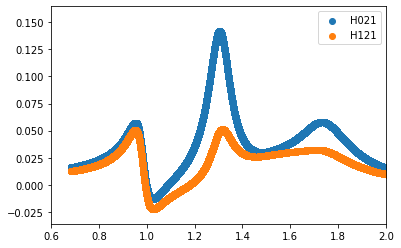

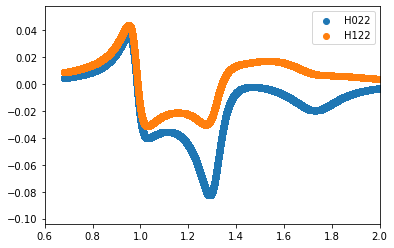

In [27]:
plt.xlim(0.6, 2.)
plt.scatter(new_data["mass"],H000,LABEL="H000")
plt.scatter(new_data["mass"],H100,LABEL="H100")
plt.legend(loc='upper right')
plt.show()
plt.xlim(0.6, 2.)
plt.scatter(new_data["mass"],H010,LABEL="H010")
plt.scatter(new_data["mass"],H110,LABEL="H110")
plt.legend(loc='upper right')
plt.show()
plt.xlim(0.6, 2.)
plt.scatter(new_data["mass"],H011,LABEL="H011")
plt.scatter(new_data["mass"],H111,LABEL="H111")
plt.legend(loc='upper right')
plt.show()
plt.xlim(0.6, 2.)
plt.scatter(new_data["mass"],H020,LABEL="H020")
plt.scatter(new_data["mass"],H120,LABEL="H120")
plt.legend(loc='upper right')
plt.show()
plt.xlim(0.6, 2.)
plt.scatter(new_data["mass"],H021,LABEL="H021")
plt.scatter(new_data["mass"],H121,LABEL="H121")
plt.legend(loc='upper right')
plt.show()
plt.xlim(0.6, 2.)
plt.scatter(new_data["mass"],H022,LABEL="H022")
plt.scatter(new_data["mass"],H122,LABEL="H122")
plt.legend(loc='upper right')
plt.show()


Plot asymmetry Sigma_4PI

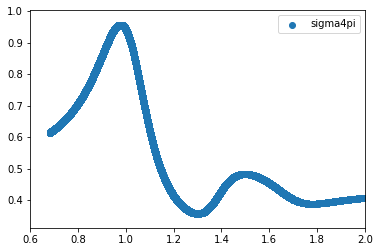

In [28]:
plt.xlim(0.6, 2.)
plt.scatter(new_data["mass"],sigma4,LABEL="sigma4pi")
plt.legend(loc='upper right')
plt.show()

Plot asymmetry Sigma_y

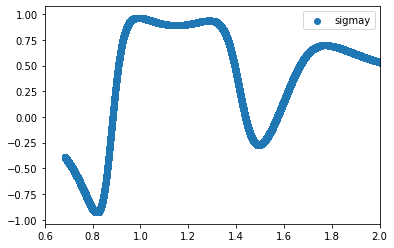

In [29]:
plt.xlim(0.6, 2.)
plt.scatter(new_data["mass"],sigmay,LABEL="sigmay")
plt.legend(loc='upper right')
